# Read the data

In [ ]:
# Import the pandas
import pandas as pd

In [ ]:
# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/diabetes.csv')

In [ ]:
# visualize the samples
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# check the shape of data
data.shape

(768, 9)

In [ ]:
# check the target varaible
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# check the percentage distribution
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Pre-processing and defining input output features

In [ ]:
# setting the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
# preparing training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

In [ ]:
# input pattern
x_train

array([[  0.   , 114.   ,  80.   , ...,  44.2  ,   0.167,  27.   ],
       [  2.   ,  99.   ,  52.   , ...,  24.6  ,   0.637,  21.   ],
       [  4.   , 110.   ,  92.   , ...,  37.6  ,   0.191,  30.   ],
       ...,
       [  4.   ,  94.   ,  65.   , ...,  24.7  ,   0.148,  21.   ],
       [ 11.   ,  85.   ,  74.   , ...,  30.1  ,   0.3  ,  35.   ],
       [  5.   , 136.   ,  82.   , ...,   0.   ,   0.64 ,  69.   ]])

In [ ]:
# check the shapes
print('Number of rows and columns of x_train resp {}'.format(x_train.shape))
print('Number of rows and columns of x_test  resp {}'.format(x_test.shape))

Number of rows and columns of x_train resp (668, 8)
Number of rows and columns of x_test  resp (100, 8)


# Initializing and training Random Forrest Classifier

In [ ]:
# Initialize the RF
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators=64, max_depth=6, oob_score=True)

In [ ]:
RF_classifier

RandomForestClassifier(max_depth=6, n_estimators=64, oob_score=True)

In [ ]:
# training the RF
RF_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=64, oob_score=True)

# Evaluating the classifier

In [ ]:
# Training score
RF_classifier.score(x_train,y_train)

0.8862275449101796

In [ ]:
# Testing score
RF_classifier.score(x_test,y_test)

0.82

In [ ]:
# Prediction on test set
y_pred = RF_classifier.predict(x_test)

In [ ]:
# Comparing the actual and predicted values
pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


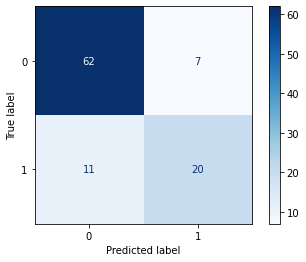

In [ ]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF_classifier, x_test, y_test, cmap='Blues')

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.82

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        69
           1       0.74      0.65      0.69        31

    accuracy                           0.82       100
   macro avg       0.80      0.77      0.78       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
# oob score
RF_classifier.oob_score_

0.7529940119760479